In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arelle import Cntlr

import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
from matplotlib.ticker import FormatStrFormatter

## **PROCESS XBRL FILES USING ARELLE**


<font size="3"> Most of the financial reports nowadays come in a special format called xbrl. One of the advantages of this format is that you can extract financial information automatically. Here I show an example using data from Superintendencia Financiera de Colombia.  <br><br> 

In [2]:
#Dictionary with company's name and xbrl files that contain financial statements
#Last two fields are when financial statement end and when it starts
FINANCIAL_STATEMENTS_DICT = {
    "BANCOLOMBIA-20170331":["0051255756_0001_000007_0000_000000_000000_C-I_2017-03-31.xbrl","2017-04-01","2017-01-01"],
    "BANCOLOMBIA-20170630":["0051338618_0001_000007_0000_000000_000000_C-I_2017-06-30.xbrl","2017-07-01","2017-04-01"],
    "BANCOLOMBIA-20170930":["0051422978_0001_000007_0000_000000_000000_C-I_2017-09-30.xbrl","2017-10-01","2017-07-01"],
    "BANCOLOMBIA-20171231":["0051547161_0001_000007_0000_000000_000000_C-C_2017-12-31.xbrl","2018-01-01","2017-10-01"],            
    "BANCOLOMBIA-20180331":["0051603010_0001_000007_0000_000000_000000_C-I_2018-03-31.xbrl","2018-04-01","2018-01-01"],
    "BANCOLOMBIA-20180630":["0051684023_0001_000007_0000_000000_000000_C-I_2018-06-30.xbrl","2018-07-01","2018-04-01"],
    "BANCOLOMBIA-20180930":["0051770581_0001_000007_0000_000000_000000_C-I_2018-09-30.xbrl","2018-10-01","2018-07-01"],
    "BANCOLOMBIA-20181231":["0051897936_0001_000007_0000_000000_000000_C-C_2018-12-31.xbrl","2019-01-01","2018-10-01"],            
    "BANCOLOMBIA-20190331":["0051946422_0001_000007_0000_000000_000000_C-I_2019-03-31.xbrl","2019-04-01","2019-01-01"],
    "BANCOLOMBIA-20190630":["0052029709_0001_000007_0000_000000_000000_C-I_2019-06-30.xbrl","2019-07-01","2019-04-01"],
    "BANCOLOMBIA-20190930":["0052121518_0001_000007_0000_000000_000000_C-I_2019-09-30.xbrl","2019-10-01","2019-07-01"],
    "BANCOLOMBIA-20191231":["0052248477_0001_000007_0000_000000_000000_C-C_2019-12-31.xbrl","2020-01-01","2019-10-01"],            
    "BANCOLOMBIA-20200331":["0052292714_0001_000007_0000_000000_000000_C-I_2020-03-31.xbrl","2020-04-01","2020-01-01"],
    "BANCOLOMBIA-20200630":["0052392183_0001_000007_0000_000000_000000_C-I_2020-06-30.xbrl","2020-07-01","2020-04-01"],
    "BANCOLOMBIA-20200930":["0052484622_0001_000007_0000_000000_000000_C-I_2020-09-30.xbrl","2020-10-01","2020-07-01"],
    "BANCOLOMBIA-20201231":["0052618568_0001_000007_0000_000000_000000_C-C_2020-12-31.xbrl","2021-01-01","2020-10-01"],            
    "BANCOLOMBIA-20210331":["0052673337_0001_000007_0000_000000_000000_C-I_2021-03-31.xbrl","2021-04-01","2021-01-01"],
    "BANCOLOMBIA-20210630":["0052765384_0001_000007_0000_000000_000000_C-I_2021-06-30.xbrl","2021-07-01","2021-04-01"],
    "BANCOLOMBIA-20210930":["0052853851_0001_000007_0000_000000_000000_C-I_2021-09-30.xbrl","2021-10-01","2021-07-01"],
    "BANCOLOMBIA-20211231":["0052994879_0001_000007_0000_000000_000000_C-C_2021-12-31.xbrl","2022-01-01","2021-10-01"],            
    "BANCOLOMBIA-20220331":["0053035156_0001_000007_0000_000000_000000_C-I_2022-03-31.xbrl","2022-04-01","2022-01-01"],
    "BANCOLOMBIA-20220630":["0053118291_0001_000007_0000_000000_000000_C-I_2022-06-30.xbrl","2022-07-01","2022-04-01"],
    "BANCOLOMBIA-20220930":["0053209545_0001_000007_0000_000000_000000_C-I_2022-09-30.xbrl","2022-10-01","2022-07-01"],
    "BANCOLOMBIA-20221231":["0053352511_0001_000007_0000_000000_000000_C-C_2022-12-31.xbrl","2023-01-01","2022-10-01"],            
    "BANCOLOMBIA-20230331":["0053389446_0001_000007_0000_000000_000000_C-I_2023-03-31.xbrl","2023-04-01","2023-01-01"],           
              }

             
#Create dataframe to store data
data_summary_df = pd.DataFrame().T

#Iterate throughout the dictionary -- this loop might take some minutes
for key in FINANCIAL_STATEMENTS_DICT:
    
    COMPANY_FS = FINANCIAL_STATEMENTS_DICT[key][0]
    
    #Import XBRL file
    xbrl = Cntlr.Cntlr().modelManager.load(COMPANY_FS)   
        
    #Convert the info into a dataframe
    factData=pd.DataFrame(data=[(fact.concept.qname,
                               fact.value,
                               fact.isNumeric,
                               fact.contextID,
                               fact.context.isStartEndPeriod,
                               fact.context.isInstantPeriod,
                               fact.context.isForeverPeriod,
                               fact.context.startDatetime,
                               fact.context.endDatetime,
                               fact.unitID) for fact in xbrl.facts])

    #Convert column 0 to text
    factData['name'] = factData.apply(lambda row: str(row[0]),axis=1)
    #Convert column 1 to numberic
    factData[1] = pd.to_numeric(factData[1],errors='coerce')
    
    #Extract equity and net income data
    
    #Patrimonio
    Equity = factData[(factData['name']=="ifrs:Equity")&(factData[8]==pd.to_datetime(FINANCIAL_STATEMENTS_DICT[key][1]))][1].values[0]
    
    #Net Income
    Net_Income = factData[(factData['name']=="ifrs:ProfitLoss")&(factData[8]==pd.to_datetime(FINANCIAL_STATEMENTS_DICT[key][1]))&(factData[7]==pd.to_datetime(FINANCIAL_STATEMENTS_DICT[key][2]))][1].values[0]
    
    #Earnings per share
    EPS = factData[(factData['name']=="ifrs:DilutedEarningsLossPerShare")&(factData[8]==pd.to_datetime(FINANCIAL_STATEMENTS_DICT[key][1]))&(factData[7]==pd.to_datetime(FINANCIAL_STATEMENTS_DICT[key][2]))][1].values[0]
    
                
    #Create list with financial data and then append it to the dataframe
    caractheristic_list = []
    caractheristic_list.append(FINANCIAL_STATEMENTS_DICT[key][1])    
    caractheristic_list.append(Equity)
    caractheristic_list.append(Net_Income)
    caractheristic_list.append(EPS)
    
    data_summary_df = data_summary_df.append(pd.DataFrame(caractheristic_list).T)


In [3]:
data_summary_df = data_summary_df.rename(columns={0:'Date',                                                
                                                1:'Equity',                                                
                                                2:'Net_Income',                                                
                                                3:'EPS',                                                
                                               })

data_summary_df.sort_values(by='Date',inplace=True)

data_summary_df

,Date,Equity,Net_Income,EPS
0,2017-04-01,22050368575.0,632053077.0,649.0
0,2017-07-01,23083111158.0,685393422.0,694.0
0,2017-10-01,23361731059.0,468054213.0,484.0
0,2018-01-01,24429548810.0,968672380.0,953.0
0,2018-04-01,23189643016.0,544049115.0,558.0
0,2018-07-01,24025200763.0,623282018.0,630.0
0,2018-10-01,24867012573.0,585712888.0,630.0
0,2019-01-01,26655223689.0,1033391195.0,1057.0
0,2019-04-01,26186769995.0,874372003.0,882.0
0,2019-07-01,27222174845.0,963544665.0,988.0


In [4]:
#Complete the data for the 3Q 2022
ord_shares = 509704584  #ordinary shares number
pre_shares = 455122416  #preferred shares number

data_summary_df['EPS'].iloc[-3] = data_summary_df['Net_Income'].iloc[-3]*1000/(ord_shares+pre_shares)
data_summary_df['Date'] = pd.to_datetime(data_summary_df['Date'])
data_summary_df

,Date,Equity,Net_Income,EPS
0,2017-04-01,22050368575.0,632053077.0,649.0
0,2017-07-01,23083111158.0,685393422.0,694.0
0,2017-10-01,23361731059.0,468054213.0,484.0
0,2018-01-01,24429548810.0,968672380.0,953.0
0,2018-04-01,23189643016.0,544049115.0,558.0
0,2018-07-01,24025200763.0,623282018.0,630.0
0,2018-10-01,24867012573.0,585712888.0,630.0
0,2019-01-01,26655223689.0,1033391195.0,1057.0
0,2019-04-01,26186769995.0,874372003.0,882.0
0,2019-07-01,27222174845.0,963544665.0,988.0


In [5]:
#Import stock closing prices
closing_prices_df = pd.read_csv('BANCOLOMBIA.csv')
closing_prices_df['Date'] = pd.to_datetime(closing_prices_df['Date'])
closing_prices_df

,Date,Last
0,2017-01-02,25400
1,2017-01-03,25500
2,2017-01-04,25680
3,2017-01-05,25680
4,2017-01-06,25700
...,...,...
1533,2023-05-11,33670
1534,2023-05-12,33200
1535,2023-05-15,32240
1536,2023-05-16,32010


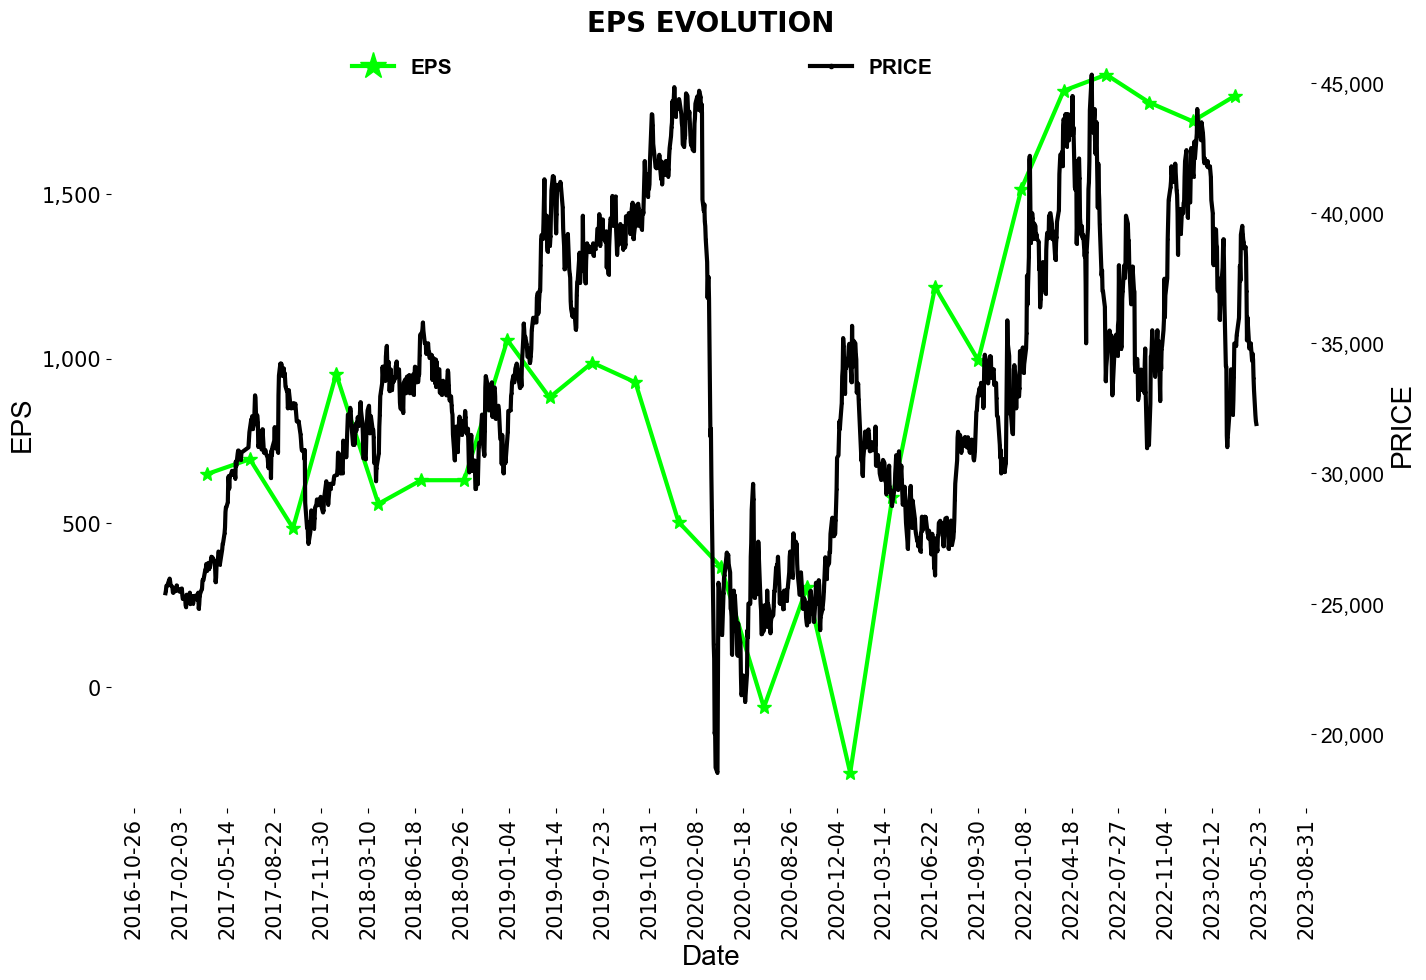

In [6]:
#Create chart

tick_spacing1 = 100

fig = plt.figure()
ax1 = plt.subplot(111,frameon=False)

font = font_manager.FontProperties(family='Arial',weight='bold', style='normal', size=15)

ax1.plot(data_summary_df['Date'],data_summary_df['EPS'],marker='*', linestyle='solid',linewidth=3,color='lime',label='EPS',markersize=10)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.0),ncol=10,markerscale=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
ax1.set_xlabel('Date',fontname = "Arial", fontsize=20,color='black')
ax1.set_ylabel('EPS',fontname = "Arial", fontsize=20,color='black')
ax1.tick_params(axis='y', color = 'black', labelcolor='black')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos:'{:,.0f}'.format(y)))
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
ax1.axis([None, None, None, None])
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(closing_prices_df['Date'],closing_prices_df['Last'],marker='o',linestyle='solid',linewidth=3,color='black',label='PRICE',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.7, 1.0),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.set_ylabel('PRICE',fontname = "Arial", fontsize=20,color='black')
ax2.axis([None, None, None, None])
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos:'{:,.0f}'.format(y)))
ax2.set_facecolor('white')
plt.box(on=None)

plt.title('EPS EVOLUTION' ,fontsize=20,weight="bold")
plt.yticks(fontname = "Arial",fontsize=15)
plt.subplots_adjust(wspace = 0.3,hspace = 0.8,bottom=0.1, right=2.0, top=1.7)
    
plt.show()

> *What we have to learn to do, we learn by doing*. *Aristotle*

<font size="3">
Follow me on <a href="https://co.linkedin.com/in/andres-gomez-hernandez" target="_blank">Linkedin</a> for topics about quantitative finance, data science and emerging markets.
</font>